In [ ]:
# import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,LSTM , GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import  Embedding
from tensorflow.keras.models import Sequential
import tensorflow as tf
import itertools

import seaborn as sns
sns.set()

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Paper')

In [ ]:
df=pd.read_csv('IMDB Dataset.csv')

In [ ]:
df=df.iloc[:10000]

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


# Preprocess the text (i.e., the steps required prior to converting the sentence into a vector) using any library of your choice.

<Axes: xlabel='sentiment', ylabel='count'>

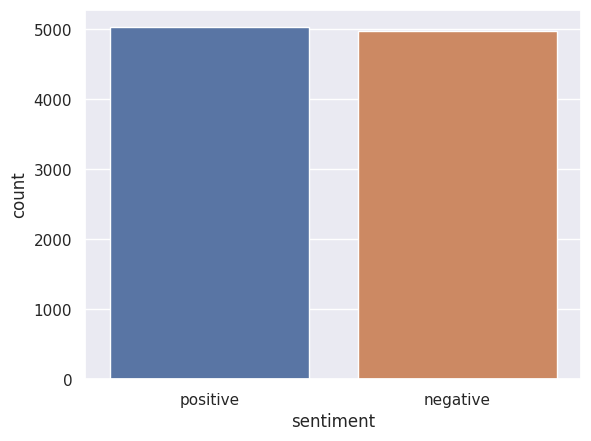

In [ ]:
import seaborn as sns
sns.countplot(df,x='sentiment')

In [ ]:
# Create a label column using manual label encoding
lab = {'positive' : 1, 'negative' : 0}
df['label'] = df['sentiment'].map(lab)
df.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [ ]:
from nltk.corpus import stopwords

In [ ]:
def clean_review(text):
    '''
    Utility function to clean review text by removing links, special characters
    using simple regex statements.
    '''

    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split()).lower()

# clean tweet
df["clean_review"] = df["review"].apply(lambda text : clean_review(text))

In [ ]:
df[['clean_review','review']]

,clean_review,review
0,one of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...
1,a wonderful little production br br the filmin...,A wonderful little production. <br /><br />The...
2,i thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...
3,basically there s a family where a little boy ...,Basically there's a family where a little boy ...
4,petter mattei s love in the time of money is a...,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...
9995,fun entertaining movie about wwii german spy j...,"Fun, entertaining movie about WWII German spy ..."
9996,give me a break how can anyone say that this i...,Give me a break. How can anyone say that this ...
9997,this movie is a bad movie but after watching a...,This movie is a bad movie. But after watching ...
9998,this is a movie that was probably made to ente...,This is a movie that was probably made to ente...


In [ ]:
df

,review,sentiment,label,clean_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production br br the filmin...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei s love in the time of money is a...
...,...,...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive,1,fun entertaining movie about wwii german spy j...
9996,Give me a break. How can anyone say that this ...,negative,0,give me a break how can anyone say that this i...
9997,This movie is a bad movie. But after watching ...,negative,0,this movie is a bad movie but after watching a...
9998,This is a movie that was probably made to ente...,negative,0,this is a movie that was probably made to ente...


In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a sentence
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'text_column'
df['sw_clean_review'] = df['clean_review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df

,review,sentiment,label,clean_review,sw_clean_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production br br the filmin...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically there s a family where a little boy ...,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei s love in the time of money is a...,petter mattei love time money visually stunnin...
...,...,...,...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive,1,fun entertaining movie about wwii german spy j...,fun entertaining movie wwii german spy julie a...
9996,Give me a break. How can anyone say that this ...,negative,0,give me a break how can anyone say that this i...,give break anyone say good hockey movie know m...
9997,This movie is a bad movie. But after watching ...,negative,0,this movie is a bad movie but after watching a...,movie bad movie watching endless series bad ho...
9998,This is a movie that was probably made to ente...,negative,0,this is a movie that was probably made to ente...,movie probably made entertain middle school ea...


In [ ]:
df = df[["sw_clean_review", "label"]]
df.head()

,sw_clean_review,label
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production br br filming tech...,1
2,thought wonderful way spend time hot summer we...,1
3,basically family little boy jake thinks zombie...,0
4,petter mattei love time money visually stunnin...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer = "word")

In [ ]:
vectorizer = CountVectorizer()
vector = vectorizer.fit_transform(df['sw_clean_review'])

In [ ]:
y=df['label']

In [ ]:
y

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: label, Length: 10000, dtype: int64

In [ ]:
##Splitting the Data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(vector,y, test_size = 0.50, random_state = 42)

In [ ]:
#training the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr.fit(X_train, Y_train)


LogisticRegression(C=1, max_iter=500, random_state=42)

In [ ]:
#predict using the model
Y_pred = lr.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report   # Model Evaluation

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print('classification report: ')
print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print('accuracy of the model: ',acc)

[[2130  399]
 [ 328 2143]]
classification report: 
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2529
           1       0.84      0.87      0.85      2471

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

accuracy of the model:  0.8546


In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

df['tokens'] = df['sw_clean_review'].apply(word_tokenize)  # Tokenize the text

# Step 2: Train Word2Vec model
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

# Step 3: Compute average vector representation
def compute_average_vector(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    return np.zeros(model.vector_size)

df['average_vector'] = df['tokens'].apply(compute_average_vector)

# Print the resulting DataFrame
df

<ipython-input-23-cb8719ed6cbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['sw_clean_review'].apply(word_tokenize)  # Tokenize the text
<ipython-input-23-cb8719ed6cbc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['average_vector'] = df['tokens'].apply(compute_average_vector)


,sw_clean_review,label,tokens,average_vector
0,one reviewers mentioned watching 1 oz episode ...,1,"[one, reviewers, mentioned, watching, 1, oz, e...","[-0.15685068, 0.25516143, 0.086772114, 0.04807..."
1,wonderful little production br br filming tech...,1,"[wonderful, little, production, br, br, filmin...","[-0.37468973, 0.22392404, 0.34620845, -0.04883..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su...","[-0.2763322, 0.2846929, 0.17126566, 0.04430005..."
3,basically family little boy jake thinks zombie...,0,"[basically, family, little, boy, jake, thinks,...","[-0.27434605, 0.31036267, 0.2028139, 0.1354830..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ...","[-0.21699007, 0.3410145, 0.12829182, 0.0075118..."
...,...,...,...,...
9995,fun entertaining movie wwii german spy julie a...,1,"[fun, entertaining, movie, wwii, german, spy, ...","[-0.23680858, 0.35674518, 0.2894274, 0.1064419..."
9996,give break anyone say good hockey movie know m...,0,"[give, break, anyone, say, good, hockey, movie...","[-0.2731719, 0.27666295, 0.15937482, 0.1718286..."
9997,movie bad movie watching endless series bad ho...,0,"[movie, bad, movie, watching, endless, series,...","[-0.42197567, 0.48056507, 0.1633392, 0.2988232..."
9998,movie probably made entertain middle school ea...,0,"[movie, probably, made, entertain, middle, sch...","[-0.45970628, 0.43346778, 0.23233373, 0.227352..."


In [ ]:
df

,sw_clean_review,label,tokens,average_vector
0,one reviewers mentioned watching 1 oz episode ...,1,"[one, reviewers, mentioned, watching, 1, oz, e...","[-0.15685068, 0.25516143, 0.086772114, 0.04807..."
1,wonderful little production br br filming tech...,1,"[wonderful, little, production, br, br, filmin...","[-0.37468973, 0.22392404, 0.34620845, -0.04883..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su...","[-0.2763322, 0.2846929, 0.17126566, 0.04430005..."
3,basically family little boy jake thinks zombie...,0,"[basically, family, little, boy, jake, thinks,...","[-0.27434605, 0.31036267, 0.2028139, 0.1354830..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ...","[-0.21699007, 0.3410145, 0.12829182, 0.0075118..."
...,...,...,...,...
9995,fun entertaining movie wwii german spy julie a...,1,"[fun, entertaining, movie, wwii, german, spy, ...","[-0.23680858, 0.35674518, 0.2894274, 0.1064419..."
9996,give break anyone say good hockey movie know m...,0,"[give, break, anyone, say, good, hockey, movie...","[-0.2731719, 0.27666295, 0.15937482, 0.1718286..."
9997,movie bad movie watching endless series bad ho...,0,"[movie, bad, movie, watching, endless, series,...","[-0.42197567, 0.48056507, 0.1633392, 0.2988232..."
9998,movie probably made entertain middle school ea...,0,"[movie, probably, made, entertain, middle, sch...","[-0.45970628, 0.43346778, 0.23233373, 0.227352..."


In [ ]:
df[df['label']==1]

,sw_clean_review,label,tokens,average_vector
0,one reviewers mentioned watching 1 oz episode ...,1,"[one, reviewers, mentioned, watching, 1, oz, e...","[-0.15685068, 0.25516143, 0.086772114, 0.04807..."
1,wonderful little production br br filming tech...,1,"[wonderful, little, production, br, br, filmin...","[-0.37468973, 0.22392404, 0.34620845, -0.04883..."
2,thought wonderful way spend time hot summer we...,1,"[thought, wonderful, way, spend, time, hot, su...","[-0.2763322, 0.2846929, 0.17126566, 0.04430005..."
4,petter mattei love time money visually stunnin...,1,"[petter, mattei, love, time, money, visually, ...","[-0.21699007, 0.3410145, 0.12829182, 0.0075118..."
5,probably time favorite movie story selflessnes...,1,"[probably, time, favorite, movie, story, selfl...","[-0.41104826, 0.36357704, 0.14982222, 0.111418..."
...,...,...,...,...
9987,rainbow brite star stealer opinion excellent m...,1,"[rainbow, brite, star, stealer, opinion, excel...","[-0.2914927, 0.25197315, 0.16887534, -0.004202..."
9991,charleton heston wore one james franciscus wor...,1,"[charleton, heston, wore, one, james, francisc...","[-0.2619858, 0.28584367, 0.16131213, 0.0282387..."
9993,citizen kane 1941 hollywood executives turned ...,1,"[citizen, kane, 1941, hollywood, executives, t...","[-0.24854358, 0.2873255, 0.15068375, 0.0157431..."
9995,fun entertaining movie wwii german spy julie a...,1,"[fun, entertaining, movie, wwii, german, spy, ...","[-0.23680858, 0.35674518, 0.2894274, 0.1064419..."


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
stop_word = set(STOPWORDS)


def generate_wordcloud(text,title = None):

    #Creating wordcloud object and getting list of frequent words from text
    wordcloud = WordCloud(background_color='white',
                          max_words=200,
                          max_font_size=40,
                          scale=3,
                          stopwords = stop_word,).generate(text)

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud,interpolation='bilinear')
    plt.show()



In [ ]:
df_pos = df[df['label']==1]
df_neg = df[df['label']==0]

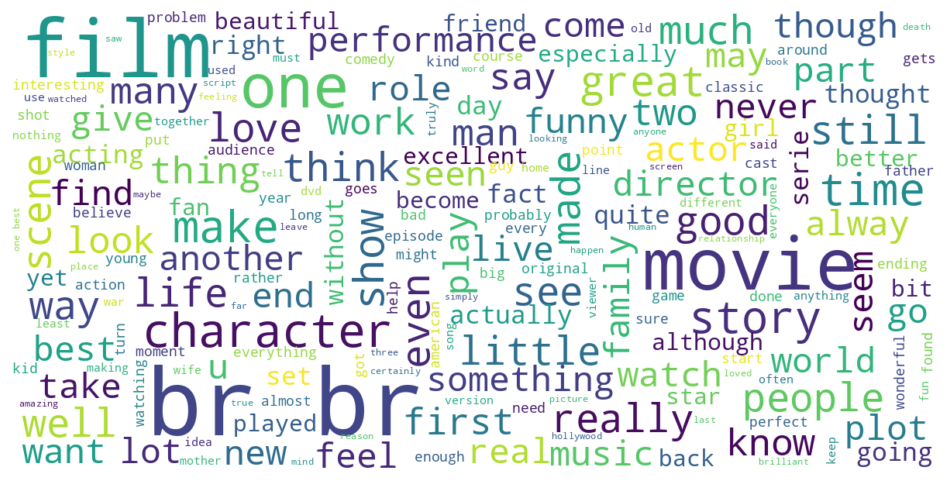

In [ ]:
generate_wordcloud(' '.join(df_pos.iloc[:,0]))

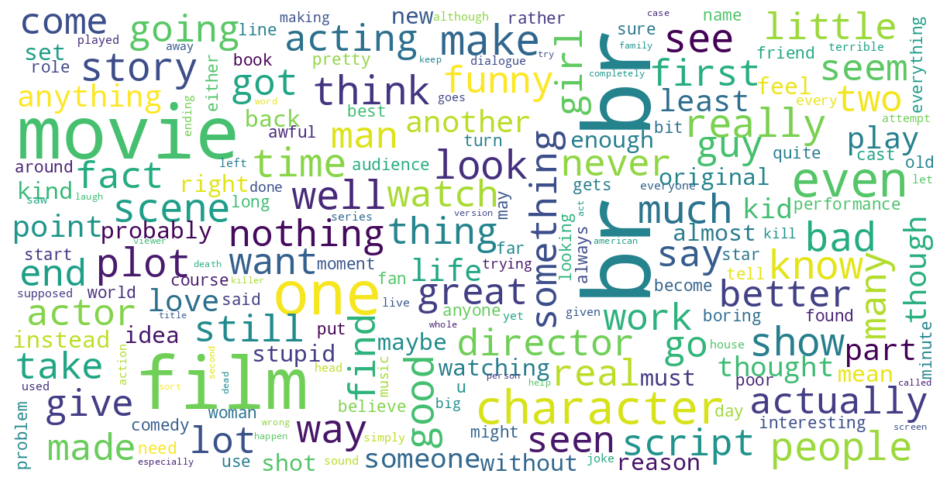

In [ ]:
generate_wordcloud(' '.join(df_neg.iloc[:,0]))

1. Sentiment classification methods above identify texts from the review dataset according to the users opinions toward movies, which are both negative and positive. The extracted data is further enhanced using feature classification techniques and these methopologies facilitate the keywords from the users reviews. After training and testing the dataset, Logistic Regression has the best result compared to the other methods.
2. The majority of the words that appear in positive reviews are "film" "movie" "still" "character", "love", people, much.
3. Many of the words that appear in negative reviews include nothing,movies,little,bad, one.
4. The imdb information shows that there are 4972 negative reviews and remaining are positive.